# My Game - Homework 1 Task 2 
# Escape from Quarantine

In [ ]:
'''
At least 3 Locations
At least 3 Items that can be interacted with. These can be doors, keys, tools, ogres, etc.
At least one “puzzle” where there are certain preconditions that must be met before the player 
    can make forward progress. This could be an Action or a Block.
At least one “win” state and at least one “lose” state.

Locations: Safehouse, Grocery store, gun shop, quarantine zone barrier
Items: pistol, crowbar, bottle of painkillers, box of pistol ammo, wooden plank
Blocks: barricade, display case, zombie, guard
Puzzles: Start in Safehouse (pick up crowbar, empty pistol), 
    Grocery store barricaded (pry off wooden planks w/ crowbar, get wooden plank, get painkillers, exit out), 
    Gun shop (hit display case to get box of pistol ammo),
    Go up the stairs to roof (shoot zombie, use wooden plank to cross over the C),
    Go up to quarantine border (bribe the guard w/ painkillers)
    Go to forest (auto win)
Win State: escape the quarantine zone to the forest
Lose State: get bitten by zombie (by hitting w/ crowbar?), attacking the guard (he shoots you)
'''

'\nAt least 3 Locations\nAt least 3 Items that can be interacted with. These can be doors, keys, tools, ogres, etc.\nAt least one “puzzle” where there are certain preconditions that must be met before the player \n    can make forward progress. This could be an Action or a Block.\nAt least one “win” state and at least one “lose” state.\n\nLocations: Safehouse, Grocery store, gun shop, quarantine zone barrier\nItems: pistol, crowbar, bottle of painkillers, box of pistol ammo, wooden plank\nBlocks: barricade, display case, zombie, guard\nPuzzles: Start in Safehouse (pick up crowbar, empty pistol), \n    Grocery store barricaded (pry off wooden planks w/ crowbar, get wooden plank, get painkillers, exit out), \n    Gun shop (hit display case to get box of pistol ammo),\n    Go up the stairs to roof (shoot zombie, use wooden plank to cross over the C),\n    Go up to quarantine border (bribe the guard w/ painkillers)\n    Go to forest (auto win)\nWin State: escape the quarantine zone to the 

### Import Text Adventures

In [ ]:
from work.text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

## Locations

In [ ]:
# Post-apocalyptic Game Locations
safehouse = things.Location(
    "Safehouse",
    "You are in a small safehouse. There might be a few tools around."
)
road = things.Location(
    "Road",
    "You are at an empty road overrun by nature; it's full of cracks and empty cars. \nThere's a grocery store here."
)
grocery = things.Location(
    "Grocery Store",
    "You are in a pillaged grocery store. \nThere's a pharmacy in the back."
)
gunshop = things.Location(
    "Gun Shop",
    "You are at an abandoned gun shop. \nThere's a display case in front of you."
)
roof = things.Location(
    "Gun Shop Rooftop",
    "You are on the roof of the shop. The quarantine border is 2 meters away. \nYou smell a terrible stench."
)
gate = things.Location(
    "Quarantine Gate",
    "You've crossed over the quarantine gate and dropped down into the tall grass.\nA patrolling guard has spotted you.\nYOU THERE - FREEZE! AND HANDS UP!!"
)
forest = things.Location(
    "Forest",
    "You've made it to the forest and escaped. \nYou win!"
)

# Map of Locations
safehouse.add_connection("out", road)
road.add_connection("in", grocery)
grocery.add_connection("east", gunshop)
gunshop.add_connection("up", roof)
roof.add_connection("east", gate)
gate.add_connection("north", forest)



# Map of Locations
# this is how we add death as a lose condition for locations: top_of_tree.add_connection("jump", death)


###  Preliminary Game Map

Here is a visualization of the locations in action castle represented as a directed graph.

![Visualization of game map starting from the tower](../map-from-tower.svg)

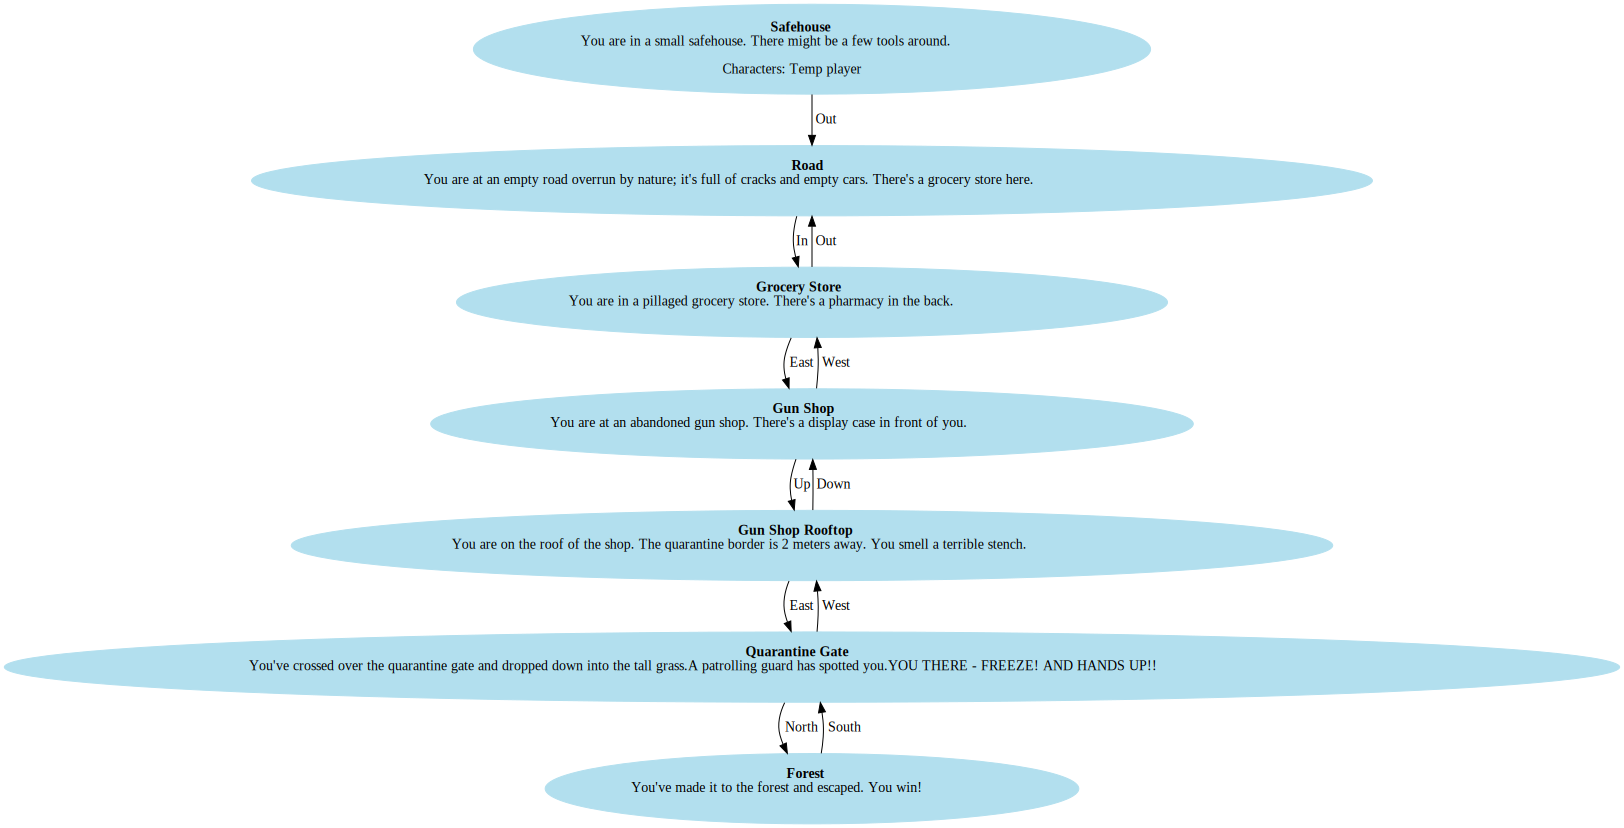

In [ ]:
tempgame = games.Game(safehouse, things.Character(name="Temp Player", description="", persona=""))

from work.text_adventure_games.viz import Visualizer
viz = Visualizer(tempgame)
graph = viz.visualize()
graph

## Items

### Gettable Items

In [ ]:
# Put a crowbar and empty pistol in the safehouse
crowbar = things.Item(
    "crowbar",
    "a steel crowbar",
    "A SIMPLE CROWBAR.",
)
crowbar.set_property("gettable", True)
crowbar.set_property("is_weapon", True)
crowbar.set_property("is_firable", False)
crowbar.add_command_hint("get crowbar")
safehouse.add_item(crowbar)

pistol = things.Item(
    "pistol",
    "a 9mm pistol",
    "A 9MM GLOCK-19.",
)
# pistol.set_property("gettable", True)
pistol.set_property("is_weapon", True)
pistol.set_property("is_loaded", False)
pistol.set_property("is_firable", True)
pistol.add_command_hint("get pistol")
safehouse.add_item(pistol)

# Put a bottle of painkillers in the grocery store
painkillers = things.Item(
    "painkillers",
    "a bottle of painkillers",
    "A BOTTLE OF PAINKILLERS THAT WILL MAKE THE USER FEEL GOOD.",
)
painkillers.set_property("gettable", True)
painkillers.add_command_hint("get painkillers")
painkillers.set_property("is_food", True)
painkillers.set_property(
            "taste", "bitter, but it gives you a small sense of euphoria.\n")
grocery.add_item(painkillers)

# Guard has a rifle
rifle = things.Item("rifle", "a semi-automatic rifle", "A SEMI-AUTOMATIC RIFLE.")
rifle.set_property("is_weapon", True)
rifle.set_property("is_firearm", True)

### Ungettable Items

In [ ]:
# A wooden barricade around the entrace to the grocery store
barricade = things.Item(
    "barricade",
    "A wooden barricade nailed to the outside of the grocery store.",
    "THE WOODEN PLANKS ARE SEALED TIGHTLY.",
)
barricade.set_property("gettable", False)
barricade.set_property("has_plank", True)
barricade.add_command_hint("pry barricade")
barricade.add_command_hint("pry barricade with crowbar")
road.add_item(barricade)

# A display case in gun shop
display = things.Item(
    "display",
    "A display case.",
    "A dusty, locked display case that holds some boxes of ammunition.",
)
display.set_property("gettable", False)
display.set_property("has_ammo", True)
display.set_property("is_broken", False)
display.add_command_hint("break open display")
display.add_command_hint("break open display with crowbar")
gunshop.add_item(display)

# An alleyway between the gunshop rooftop and the quarantine border gate
alley = things.Item(
    "alley",
    "An alleyway is between the gunshop rooftop and the quarantine border gate.",
    "It's a long way down..."
)
alley.set_property("gettable", False)
alley.set_property("is_planked", False)
alley.add_command_hint("place plank")
alley.add_command_hint("shoot ___ ___ ____")
roof.add_item(alley)

## Characters

### Player

In [ ]:
# Player
player = things.Character(
    name="The player",
    description="You are a lone apocalypse survivor.",
    persona="I need to escape from this place.",
)
player.set_property("is_dead", False)

### Non-Player Characters (NPCs)

In [ ]:
# A zombie on the rooftop
zombie = things.Character(
    name="zombie",
    description="A zombie with pungent rotting flesh and glazed-over eyes.",
    persona="BRAINS..."
)
zombie.set_property("is_hungry", True)
zombie.set_property("character_type", "human")
roof.add_character(zombie)

# A guard at the quarantine gate
guard = things.Character(
    name="guard",
    description="A guard equipped with PPE and a scary-looking rifle.",
    persona="Noone goes in, noone comes out."
)
guard.set_property("is_suspicious", True)
guard.set_property("is_guard", True) # can't be shot or attacked
guard.set_property("character_type", "human")
guard.add_to_inventory(rifle)
gate.add_character(guard)

## Actions

We will implement an action for each of the following:

- Reload
- Shooting
- Place wooden plank 
- Pry off barricade

In [ ]:
class Shoot(actions.Action):
    ACTION_NAME = "shoot"
    ACTION_DESCRIPTION = "Shoot someone with a weapon"
    ACTION_ALIASES = ["fire at"]

    def __init__(
        self,
        game,
        command: str
    ):
        super().__init__(game)
        attack_words = ["shoot", "shoot at", "fire at"]
        command_before_word = ""
        command_after_word = command
        for word in attack_words:
            if word in command:
                parts = command.split(word, 1)
                command_before_word = parts[0]
                command_after_word = parts[1]
                break
        self.attacker = self.parser.get_character(command_before_word)
        self.victim = self.parser.get_character(command_after_word)
        self.weapon = self.parser.match_item(command, self.attacker.inventory)
        self.ammo = self.parser.match_item(
            "ammo", self.parser.get_items_in_scope(self.attacker)
        )

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be an attacker and a victim
        * They must be in the same location
        * There must be a matched weapon
        * The attacker must have the weapon AND round in their inventory
        * The weapon have the property 'is_weapon'
        * The weapon must have 'is_firable
        * The victim must not already be dead
        """
        if not self.was_matched(self.attacker):
            description = "The attacker couldn't be found."
            self.parser.fail(description)
            return False
        if not self.was_matched(self.victim):
            description = "The character you want to attack wasn't matched."
            self.parser.fail(description)
            return False
        if not self.attacker.location.here(self.victim):
            description = "The two characters must be in the same location."
            self.parser.fail(description)
            return False
        if not self.was_matched(
            self.weapon,
            error_message="Which weapon should I shoot?"
        ):
            return False
        if not self.attacker.is_in_inventory(self.weapon):
            description = "{name} doesn't have the {weapon}.".format(
                name=self.attacker.name, weapon=self.weapon.name
            )
            self.parser.fail(description)
            return False
        if not self.weapon.get_property("is_weapon"):
            description = "{item} is not a weapon".format(item=self.weapon.name)
            self.parser.fail(description)
            return False
        if not self.weapon.get_property("is_firable"):
            description = "{item} is not a firearm".format(item=self.weapon.name)
            self.parser.fail(description)
            return False
        if not self.ammo:
            description = "{item} does not have any ammunition".format(item=self.weapon.name)
            self.parser.fail(description)
            return False
        if self.victim.get_property("is_dead"):
            description = "{name} is already dead".format(name=self.victim.name)
            self.parser.fail(description)
            return False
        return True

    def apply_effects(self):
        """
        Effects:
        * If the victim is not a guard
        ** Kills the victim
        ** The victim drops all items in their inventory
        * Removes the ammo from the attacker's inventory
        """
        description = "{attacker} fired at {victim} with the {weapon}.".format(
            attacker=self.attacker.name,
            victim=self.victim.name,
            weapon=self.weapon.name,
        )
        self.parser.ok(description)

        # remove ammo
        self.weapon.set_property("is_loaded", False)
        ammo = self.parser.match_item(
            "ammo", self.parser.get_items_in_scope(self.attacker)
        )
        self.attacker.remove_from_inventory(ammo)

        if self.victim.get_property("is_guard"):
            description = "The guard's PPE is armored and absorbs your bullet. {name} returns fire with his rifle, killing you.".format(
                name=self.victim.name
            )
            self.attacker.set_property("is_dead", True) # kill the player
            self.parser.ok(description)
        else:
            # the victim is dead
            self.victim.set_property("is_dead", True)
            self.victim.set_property("is_suspicious", False)
            description = "{name} was killed.".format(
                name=self.victim.name.capitalize()
            )
            self.parser.ok(description)

            # the victim drops their inventory
            items = list(self.victim.inventory.keys())
            for item_name in items:
                item = self.victim.inventory[item_name]
                command = "{victim} drop {item}".format(
                    victim=self.victim.name, item=item_name
                )
                drop = things.Drop(self.game, command)
                if drop.check_preconditions():
                    drop.apply_effects()


In [ ]:
class Place_Plank(actions.Action):
    ACTION_NAME = "place plank"
    ACTION_DESCRIPTION = "Place a wooden plank in the world"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.parser.get_character(command)
        self.plank = self.parser.match_item(
            "plank", self.parser.get_items_in_scope(self.character)
        )

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character has plank in inventory
        """
        if not self.character.is_in_inventory(self.plank):
            return False
        return True

    def apply_effects(self):
        """
        Effects:
        * The plank is removed from their inventory
        * The plank is added as an item to the current location
        """
        self.character.remove_from_inventory(self.plank)
        self.character.location.add_item(self.plank)
        self.character.location.set_property("is_planked", True)
        d = "{character_name} placed a wooden plank down."
        description = d.format(character_name=self.character.name)
        self.parser.ok(description)

In [ ]:
class Pry_Barricade(actions.Action):
    ACTION_NAME = "pry barricade"
    ACTION_DESCRIPTION = "Pry a wooden barricade open"
    ACTION_ALIASES = []

    def __init__(self, game, command: str):
        super().__init__(game)
        self.character = self.parser.get_character(command)
        self.barricade = self.parser.match_item(
            "barricade", self.parser.get_items_in_scope(self.character)
        )
        self.crowbar = False
        if " with crowbar" in command:
            self.crowbar = self.parser.match_item(
                "crowbar", self.parser.get_items_in_scope(self.character)
            )
        self.barricade.set_property("has_plank", True)

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a barricade
        """
        if not self.was_matched(self.barricade, "There's no barricade here."):
            return False
        return True

    def apply_effects(self):
        """
        Effects:
        * Creates a new item for the plank
        * Adds the plank to the character's inventory
        * Sets the 'has_plank' property of the barricade to False.
        """
        if not self.crowbar:
            no_crowbar = "".join(
                [
                    f"{self.character.name} tries to pry open the barricade with their hands,", 
                    " but it's sealed too tightly.",
                ]
            )
            self.parser.fail(no_crowbar)
            return None

        plank = things.Item("plank", "a wooden plank", "IT'S WARPED AND MOLDY.")
        plank.add_command_hint("place plank")
        self.barricade.set_property("has_plank", False)
        self.character.add_to_inventory(plank)

        d = "".join(
            [
                f"{self.character.name} wedges their crowbar between the planks of the barricade",
                " and prys it open, revealing an entryway. \nOne of the wooden planks is placed in your inventory.",
            ]
        )
        description = d.format(character_name=self.character.name)
        self.parser.ok(description)


In [ ]:
class Open_Display(actions.Action):
    ACTION_NAME = "break open display"
    ACTION_DESCRIPTION = "Break open display with your crowbar."
    ACTION_ALIASES = []

    def __init__(self, game, command: str):
        super().__init__(game)
        self.character = self.parser.get_character(command)
        self.display = self.parser.match_item(
            "display", self.parser.get_items_in_scope(self.character)
        )
        self.crowbar = False
        if " with crowbar" in command:
            self.crowbar = self.parser.match_item(
                "crowbar", self.parser.get_items_in_scope(self.character)
            )
        self.display.set_property("is_broken", False)
        self.display.set_property("has_ammo", True)

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a display case
        * It must not already be broken
        """
        if not self.was_matched(self.display, "There's no display case here."):
            return False
        if self.display.get_property("is_broken"):
            description = "It's already broken."
            self.parser.fail(description)
            return False
        return True

    def apply_effects(self):
        """
        Effects:
        * Creates a new item for the ammo
        * Adds the ammo to the character's inventory
        * Sets the 'has_ammo' property of the display to False.
        * Sets the 'is_broken' property of the display to True.
        """
        if not self.crowbar:
            no_crowbar = "".join(
                [
                    f"{self.character.name} tries to smash open the display case with their hands,", 
                    " but the glass is too thick to break without some sort of tool.",
                ]
            )
            self.parser.fail(no_crowbar)
            return None

        ammo = things.Item("ammo", "x1 9mm pistol round", "ONE SHOT IS ENOUGH.")
        self.display.set_property("has_ammo", False)
        self.display.set_property("is_broken", True)
        self.character.add_to_inventory(ammo)

        d = "".join(
            [
                f"{self.character.name} smashes through the thick display case glass",
                " and reaches in for a single 9mm round.",
                " \nx1 9mm round is placed in your inventory.",
            ]
        )
        description = d.format(character_name=self.character.name)
        self.parser.ok(description)


In [ ]:
class Bribe(actions.Action):
    ACTION_NAME = "bribe"
    ACTION_DESCRIPTION = "Bribe someone"
    ACTION_ALIASES = [] 
    
    def __init__(self, game, command: str):
        super().__init__(game) 
        bribe_words = ["bribe"]
        command_before_word = ""
        command_after_word = command
        for word in bribe_words:
            if word in command:
                parts = command.split(word, 1)
                command_before_word = parts[0]
                command_after_word = parts[1]
                break
        self.briber = self.parser.get_character(command_before_word)
        self.bribed = self.parser.get_character(command_after_word)
        self.painkillers = False
        if " with painkillers" in command:
            self.painkillers = self.parser.match_item(
                "painkillers", self.parser.get_items_in_scope(self.briber)
            )

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The two characters must be in the same place
        * The briber must have painkillers in inventory
        * The briber must bribe them with painkillers
        """
        if not self.briber.location == self.bribed.location:
            description = "There isn't any {character} in this location.".format(
                character=self.bribed.name
            )
            self.parser.fail(description)
            return False
        if not self.briber.is_in_inventory(painkillers):
            description = "The {bribed} looks you up and down and determines you have nothing he wants. \nThe guard fires his rifle at you!!".format(
                character=self.briber.name,
                bribed=self.bribed.name
            )
            self.parser.fail(description)
            self.briber.set_property("is_dead", True)
            return False
        if not self.painkillers:
            description = "{character} did not fall for the bribe.".format(
                character=self.bribed.name
            )
            self.parser.fail(description)
            return False
        return True

    def apply_effects(self):
        """
        Effects:
        * They say something indicating you can continue on
        * The painkillers are removed from the briber's inventory
        * The guard is no longer suspicious
        """
        description = "The guard takes the painkillers and give you a swift, subtle nod."
        self.parser.ok(description)

        self.bribed.set_property("is_suspicious", False)
        self.briber.remove_from_inventory(self.painkillers)


## Blocks

In text adventure games, _blocks_ are essentially puzzles to unlock the next stage in the game.

We give you a `Troll_Block` for an example of what an implementation looks like.

You should implement:
* The guard block (similar to the troll block)
* The darkness block (unblocked if any character at the location is carrying
  a lit item (like a lamp or candle)
* A locked door block

In [ ]:
class Barricade_Block(blocks.Block):
    """
    Blocks entering the grocery until "pry off barricade with crowbar"
    """

    def __init__(self, location: things.Location, barricade: things.Item):
        super().__init__(
            "A makeshift barricade nailed to the entrance of the grocery.", "The grocery store is boarded up."
        )
        self.location = location
        self.barricade = barricade

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a barricade here
        # * The barricade has a plank
        if self.barricade.get_property("has_plank"):
            return True
        return False

In [ ]:
class Zombie_Block(blocks.Block):
    """
    Blocks progress in this direction until the zombie has been shot in the head.
    """

    def __init__(self, location: things.Location, zombie: things.Character):
        super().__init__(
            "A zombie blocks your way", "The zombie is in between you and the ledge."
        )
        self.location = location
        self.zombie = zombie

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a zombie here
        # * The zombie is not "dead" meaning shot in the head
        if self.zombie:
            if not self.location.here(self.zombie):
                return False
            if not self.zombie.get_property("is_dead"):
                return True
        return False

In [ ]:
class Alley_Block(blocks.Block):
    """
    Blocks progress in this direction until a wooden plank is placed over the gap between the building and gate.
    """

    def __init__(self, location: things.Location, alley: things.Item):
        super().__init__(
            "An alleyway is between the roof and the quarantine gate.", "There's no way you can jump across."
        )
        self.location = location
        self.alley = alley

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a alleyway here
        # * There is a plank in the current location
        if self.alley:
            if not self.location.here(self.alley):
                return False
            if not self.location.get_property("is_planked"):
                return True
            if not zombie.get_property("is_dead"):
                description = "A zombie is blocking your way!!"
                print(description)
                return True
        return False

In [ ]:
class Guard_Block(blocks.Block):
    """
    Blocks progress in this direction until the guard is no longer suspicious aka been bribed.
    """

    def __init__(self, location: things.Location, guard: things.Character):
        super().__init__(
            "A guard blocks your way", "The guard demands payment or you can't leave..."
        )
        self.location = location
        self.guard = guard

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a guard here
        # * The guard is suspicious (giving painkillers change this)
        # * The guard sees you have valuables on you

        if self.guard:
            if not self.location.here(self.guard):
                return False
            if not self.guard.get_property("is_suspicious"):
                return False
            return True
        return False

In [ ]:
# Add blocks to location to:
# the road - barricade prevents entry to grocery store
# the gunshop - display case prevents access to box of ammo: removed because it prevents player from continuing
# going to turn it into an object
# the rooftop - zombie prevents you from going east
# the roof - alleyway prevents you from going east
# the gate - guard prevents you from going north

barricade_block = Barricade_Block(road, barricade)
road.add_block("in", barricade_block)


alley_block = Alley_Block(roof, alley)
roof.add_block("east", alley_block)


# zombie_block = Zombie_Block(roof, zombie)
# roof.add_block("east", zombie_block)


guard_block = Guard_Block(gate, guard)
guard.add_command_hint("bribe... but with what?")
gate.add_block("north", guard_block)

## Play Escape from Quarantine Zone

In [ ]:
class EscapeFromQZ(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)

    def is_won(self) -> bool:
        """ 
        Checks whether the game has been won. For EFQ, the game is won
        once the player reaches the forest.
        """
        if player.location == forest:
            msg = "{name} has escaped the Quarantine Zone! {name} has WON THE GAME!!!\n\n"
            self.parser.ok(msg.format(name=player.name.title()))
            return True
        #if player.get_property("is_dead"): # Doesn't work and only executes code in games.py 
        #    print("You are dead. \nGAME OVER\n")
        #    msg = "You are dead \nGAME OVER\n"
        #    self.parser.ok(msg)
        #    return False
        return False

In [ ]:
characters = [zombie, guard]
custom_actions = [Shoot, Pry_Barricade, Place_Plank, Open_Display, Bribe]

# The Game
game = EscapeFromQZ(safehouse, player, characters=characters, custom_actions=custom_actions)

In [ ]:
game.game_loop()

look
You are in a small safehouse. There might be a few tools around.
Exits:
Out to Road

You see:
 * a steel crowbar
        get crowbar
 * a 9mm pistol
        get pistol
Characters:
 *

get crowbar, get pistol, go out, pry barricade with crowbar, go in, go east, break open display with crowbar, go up, shoot zombie with pistol, place plank, go east, bribe guard
get crowbar
The player got the crowbar.
get pistol
The player got the pistol.
go out
You are at an empty road overrun by nature; it's full of cracks and empty cars.
There's a grocery store here.
Exits:
In to Grocery Store

You see:
 * A wooden barricade nailed to the outside of the grocery store.
        pry barricade
        pry barricade with crowbar


pry barricade with crowbar
The player wedges their crowbar between the planks of the barricade and prys it
open, revealing an entryway.
One of the wooden planks is placed in your inventory.
go in
You are in a pillaged grocery store.
There's a pharmacy in the back.
Exits:
Out t

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12d8c644-e8eb-4c10-89de-bc2567d69141' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>